In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('3_gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,pred,luxury_score
0,flat,godrej,sector 79,1.30,8269.0,1572.0,Super Built up area 1572(146.04 sq.m.),2,2,3,3.0,North-East,New Property,1572.0,NaN,NaN,1,0,0,0,0,0,0,49.0
1,flat,trisara our homes 3,sohna road,0.21,4339.0,484.0,Built Up area: 484 (44.97 sq.m.),1,1,0,2.0,NaN,Undefined,NaN,484.0,NaN,0,0,0,0,0,0,0,0.0
2,flat,spaze privvy the address,sector 93,1.45,8033.0,1805.0,Super Built up area 1805(167.69 sq.m.)Built Up...,3,4,2,12.0,North-East,Relatively New,1805.0,1350.0,1100.0,0,0,0,0,0,2,0,96.0
3,flat,experion the heartsong,sector 108,0.90,7014.0,1283.0,Super Built up area 1283(119.19 sq.m.),2,3,3,7.0,East,Relatively New,1283.0,NaN,NaN,0,1,0,0,1,0,0,72.0
4,house,house number b-34,sector 5,0.80,8888.0,900.0,Plot area 900(83.61 sq.m.)Built Up area: 900 s...,2,2,1,1.0,NaN,Old Property,NaN,900.0,NaN,0,0,0,0,0,0,0,0.0


In [6]:
df.shape

(3680, 24)

In [7]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'pred', 'luxury_score'],
      dtype='object')

<ipython-input-8-ea43129b75a2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

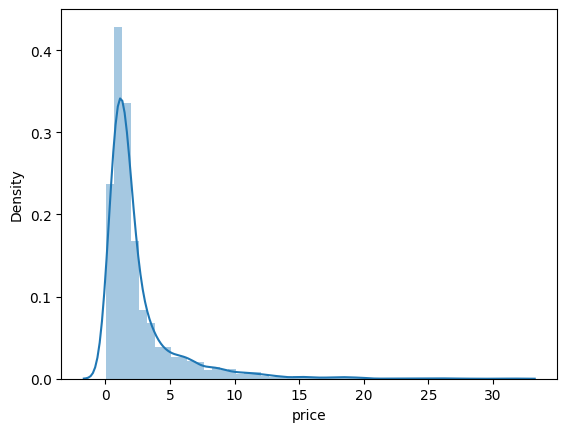

In [8]:
# outliers on the basis of price column
sns.distplot(df['price'])

<Axes: xlabel='price'>

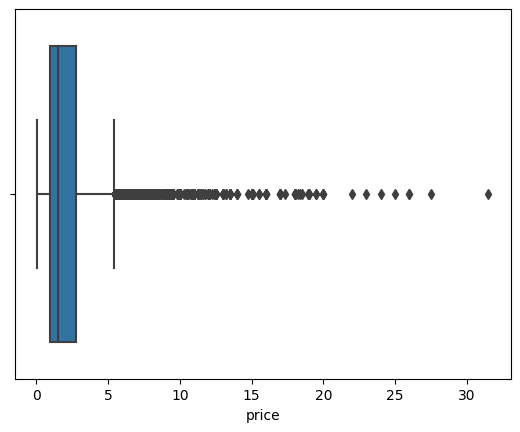

In [9]:
sns.boxplot(x=df['price'])

In [10]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [11]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,pred,luxury_score
3647,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,1,0,NaN
487,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,2,0,49.0
2610,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,1,0,65.0
2962,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,2,1,150.0
1682,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,0,0,0.0
672,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,2,1,40.0
3540,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,2,1,0.0
1679,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,0,0,45.0
2929,house,dlf city plots,sector 26,20.00,44265.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,2,1,130.0
2349,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,2,0,113.0


In [12]:
# on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

In [13]:
outliers.to_csv('Price_outliers.csv',index=False)

### Price_per_sqft

<ipython-input-14-03a688873ccd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

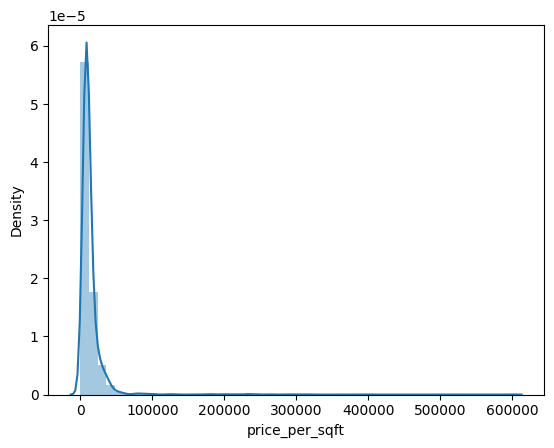

In [14]:
sns.distplot(df['price_per_sqft'])

In [15]:
df['price_per_sqft'].describe()

count      3663.000000
mean      13895.628720
std       23200.915563
min           4.000000
25%        6818.000000
50%        9022.000000
75%       13888.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft'>

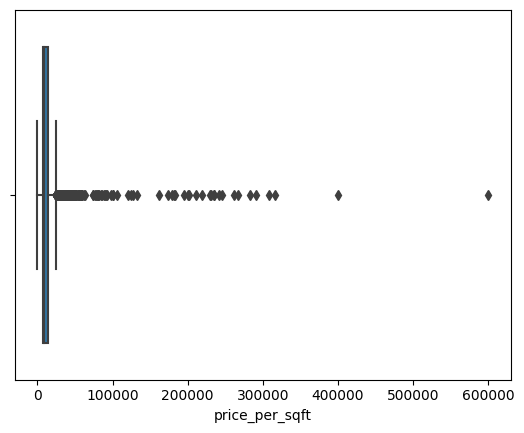

In [16]:
sns.boxplot(x=df['price_per_sqft'])

In [17]:
# Calculate the IQR for the 'price_per_sqft' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(353,
 count       353.000000
 mean      52672.226629
 std       61218.883253
 min       24500.000000
 25%       28233.000000
 50%       33404.000000
 75%       42032.000000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [18]:
outliers_sqft.to_csv('outliers_sqft.csv',index=False)

In [19]:
# outliers where values area is below 1000 those values are in yard
# Convert it into sq.feet

In [20]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

<ipython-input-20-8c5ad871d258>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [21]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

<ipython-input-21-f07934424e06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [22]:
outliers_sqft['price_per_sqft'].describe()

count      353.000000
mean     29371.696884
std      12417.964865
min       2723.000000
25%      25562.000000
50%      29880.000000
75%      35556.000000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [23]:
df.update(outliers_sqft)

<ipython-input-24-03a688873ccd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

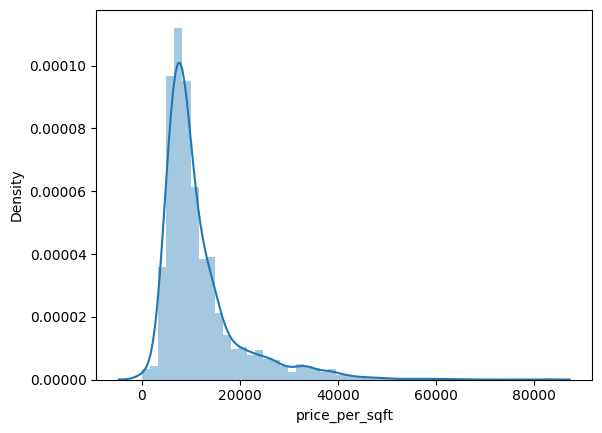

In [24]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

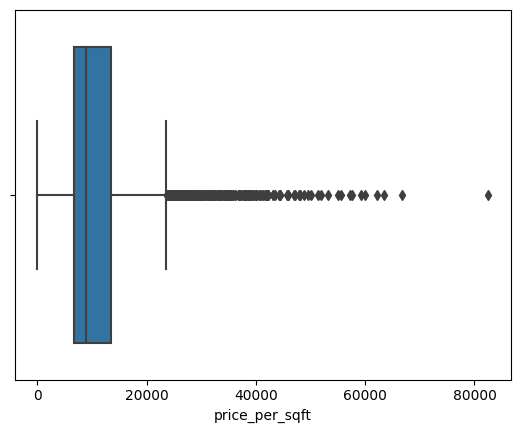

In [25]:
sns.boxplot(x=df['price_per_sqft'])

In [26]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,pred,luxury_score
448,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16.0,16.0,3+,4.0,West,New Property,NaN,325.0,300.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,31.0
672,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5.0,5.0,2,1.0,North-East,Old Property,NaN,400.0,NaN,1.0,1.0,0.0,1.0,0.0,2.0,1.0,40.0
955,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16.0,20.0,3+,4.0,East,New Property,NaN,2844.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,1.0,35.0
990,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4.0,4.0,3,2.0,North,Relatively New,NaN,250.0,200.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0,38.0
1868,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12.0,12.0,3+,4.0,North,New Property,NaN,1600.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,1.0,109.0
1897,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4.0,5.0,3+,2.0,North,Old Property,NaN,2250.0,NaN,1.0,1.0,0.0,0.0,0.0,2.0,1.0,117.0
2238,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4.0,4.0,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,1.0,1.0,0.0,1.0,0.0,1.0,1.0,16.0
2409,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2.0,1.0,0,1.0,NaN,Undefined,NaN,140.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0
2610,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16.0,16.0,3+,4.0,North-West,New Property,NaN,400.0,350.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,65.0
2644,flat,unitech vistas,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3.0,3.0,0,7.0,NaN,Undefined,NaN,1565.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0


In [27]:
# update the dataframe with values less than 50000
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

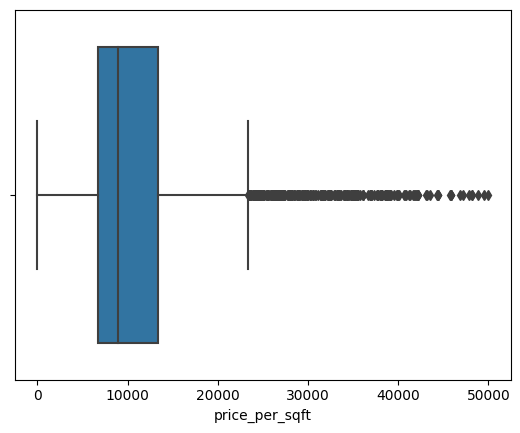

In [28]:
# still values beyond upper limit but there are lot of them and makes sense
sns.boxplot(x=df['price_per_sqft'])

### Area

<ipython-input-29-e045d1b00126>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

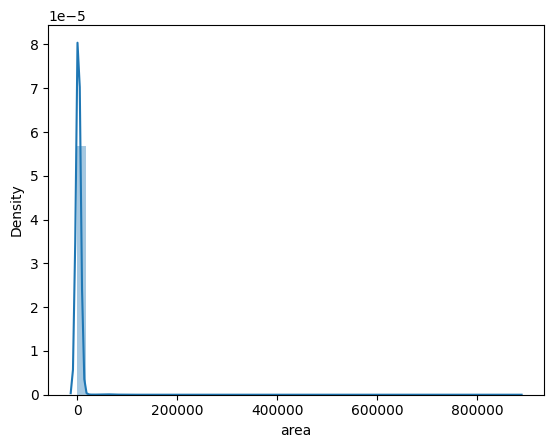

In [29]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

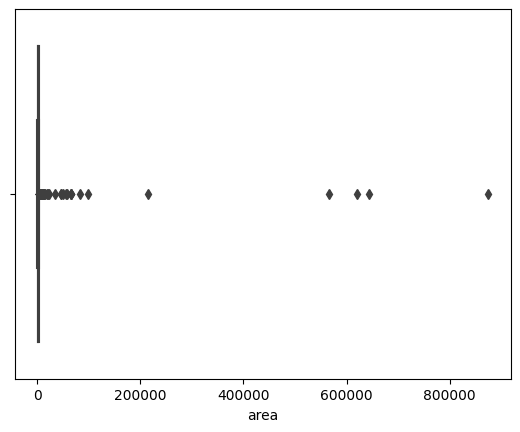

In [30]:
sns.boxplot(x=df['area'])

In [31]:
df['area'].describe()

count      3650.000000
mean       2945.815890
std       23198.708773
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2343.750000
max      875000.000000
Name: area, dtype: float64

In [32]:
df[df['area'] > 100000]
# all values with low price

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,pred,luxury_score
585,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2.0,2.0,1,3.0,North,New Property,NaN,NaN,514396.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0
1095,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6.0,5.0,3+,2.0,NaN,New Property,NaN,2.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,0.0,93.0
1152,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2.0,2.0,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0
1329,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2.0,2.0,2,2.0,South-West,New Property,NaN,NaN,569243.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,174.0
3137,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2.0,2.0,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,44.0


In [33]:
# Removing entries above area 100000
df = df[df['area'] < 100000]

<ipython-input-34-e045d1b00126>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

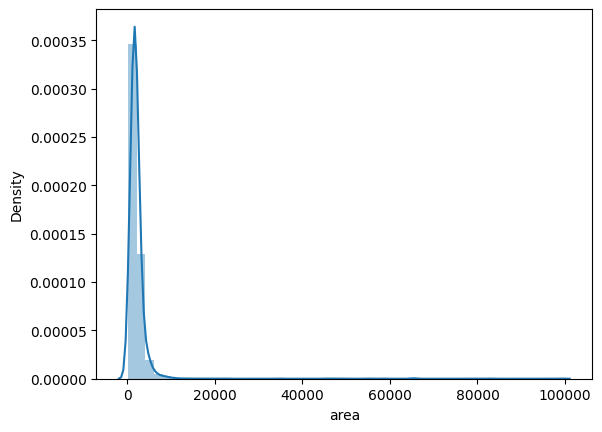

In [34]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

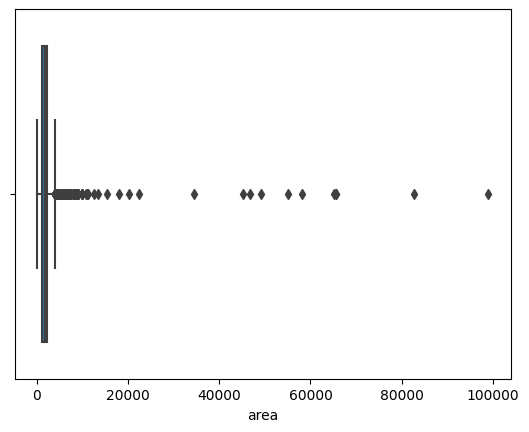

In [35]:
sns.boxplot(x=df['area'])

In [36]:
df[df['area'] > 10000].sort_values('area',ascending=False)
# properties where price and area is suspicious
# 818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,pred,luxury_score
1812,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0.0,1.0,1.0,1.0,0.0,2.0,0.0,24.0
1165,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49.0
3105,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
3044,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
1401,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.0
2848,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
1718,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
3051,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1581,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0.0,1.0,1.0,0.0,0.0,2.0,1.0,111.0
2317,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,98.0


In [37]:
# Drop these properties
df.drop(index=[818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471], inplace=True)

In [38]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,pred,luxury_score
1812,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0.0,1.0,1.0,1.0,0.0,2.0,0.0,24.0
1165,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49.0
3105,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
3044,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
1401,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.0
2848,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
1718,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
3051,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1581,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0.0,1.0,1.0,0.0,0.0,2.0,1.0,111.0
2317,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,98.0


In [39]:
# Fill these property's area values with built_up area/carpet area values
df.loc[48,'area'] = 115*9
df.loc[300,'area'] = 7250
df.loc[2666,'area'] = 5800
df.loc[1358,'area'] = 2660
df.loc[3195,'area'] = 2850
df.loc[2131,'area'] = 1812
df.loc[3088,'area'] = 2160
df.loc[3444,'area'] = 1175

<ipython-input-40-e045d1b00126>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

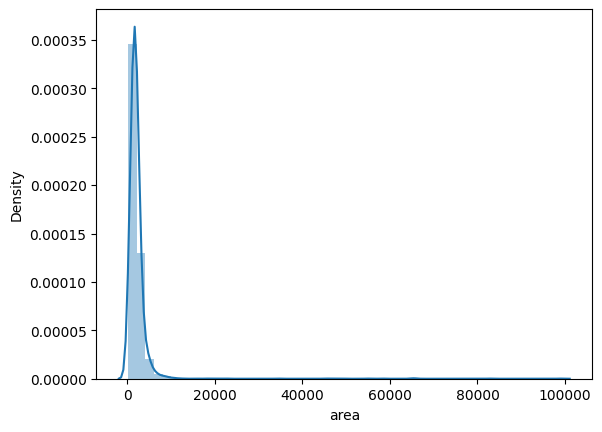

In [40]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

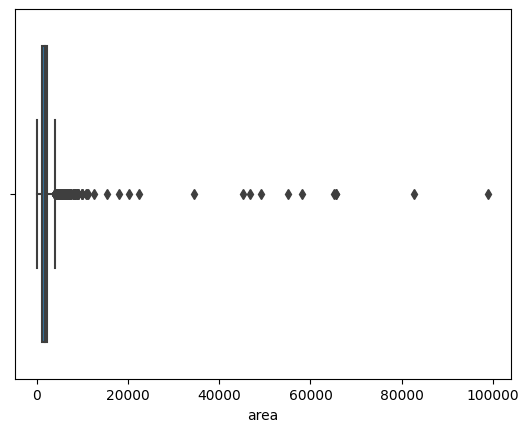

In [41]:
sns.boxplot(x=df['area'])
# There are still outliers but they are not data errors anymore

In [42]:
df['area'].describe()

count     3636.000000
mean      2150.018152
std       3623.147897
min        145.000000
25%       1261.000000
50%       1750.000000
75%       2343.250000
max      98978.000000
Name: area, dtype: float64

### Bedroom

<ipython-input-43-926418d7e639>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

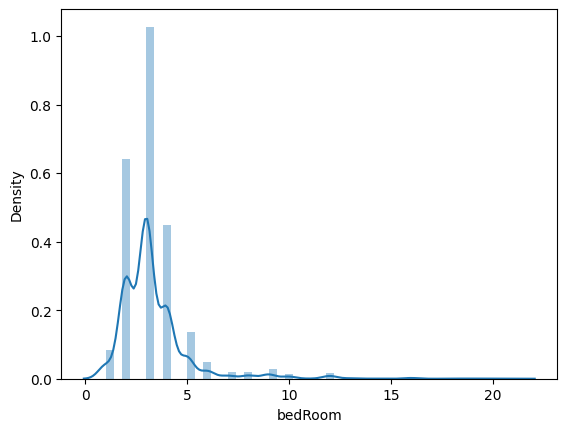

In [43]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

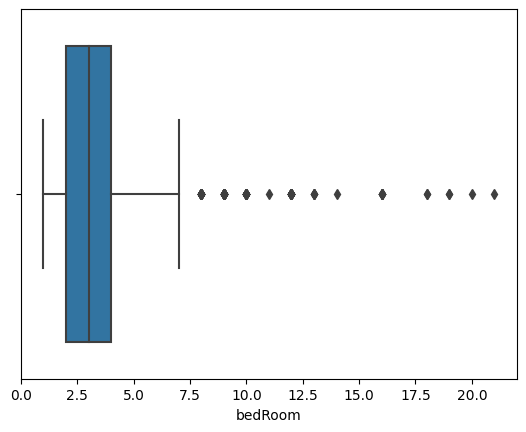

In [44]:
sns.boxplot(x=df['bedRoom'])

In [45]:
df['bedRoom'].describe()

count    3636.000000
mean        3.331958
std         1.830231
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [46]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False).shape[0]

45

In [47]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,pred,luxury_score
385,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21.0,21.0,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49.0
1349,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20.0,20.0,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,35.0
3445,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19.0,17.0,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,89.0
2835,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19.0,17.0,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1837,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18.0,18.0,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,0.0,110.0
1419,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18.0,18.0,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0,82.0
1423,house,independent,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16.0,18.0,2,4.0,West,New Property,NaN,2700.0,NaN,0.0,1.0,0.0,1.0,0.0,2.0,0.0,62.0
1131,house,independent,sector 11,4.50,25000.0,1800.0,Plot area 200(167.23 sq.m.),16.0,16.0,3+,4.0,South,Relatively New,NaN,1800.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,0.0,6.0
3543,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16.0,16.0,3+,4.0,NaN,New Property,NaN,3078.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,0.0,73.0
228,house,independent,sector 43,13.50,50000.0,2700.0,Plot area 300(250.84 sq.m.),16.0,16.0,3+,4.0,North-West,Relatively New,NaN,2700.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,0.0,41.0


In [48]:
# Keeping the properties with bedrooms below 10
df = df[df['bedRoom'] <= 10]

In [49]:
df.shape

(3591, 24)

<ipython-input-50-926418d7e639>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

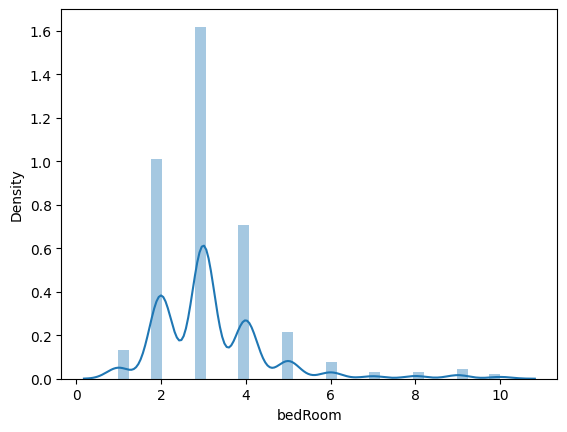

In [50]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

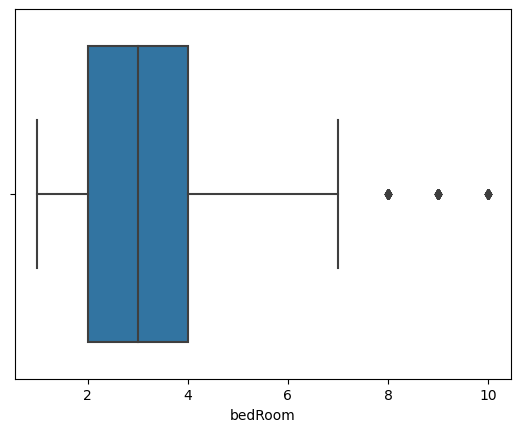

In [51]:
sns.boxplot(x=df['bedRoom'])

In [52]:
df['bedRoom'].describe()

count    3591.000000
mean        3.202172
std         1.394500
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

### Bathroom

<ipython-input-53-6f8990f100b4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

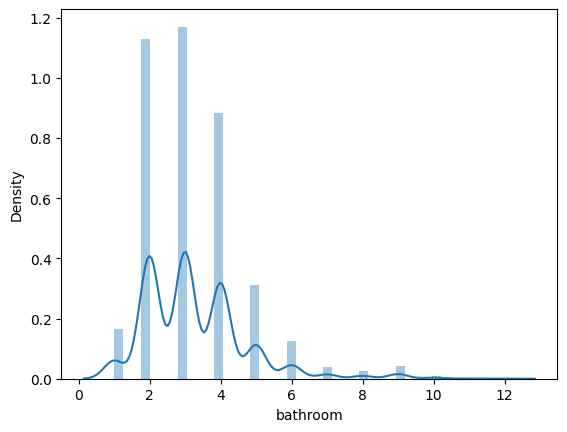

In [53]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

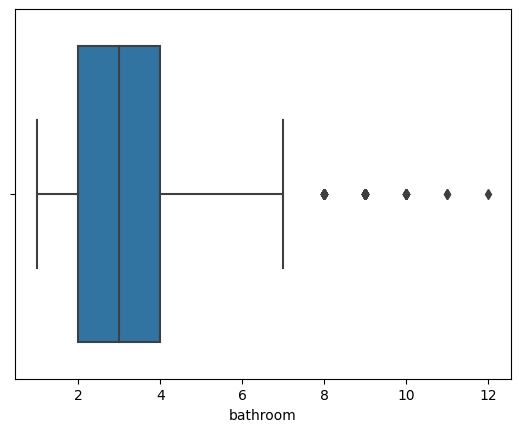

In [54]:
sns.boxplot(x=df['bathroom'])

In [55]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)
# Keeping these properties, seems logical considering bed rooms

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,pred,luxury_score
3153,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9.0,12.0,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,1.0,153.0
398,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10.0,11.0,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,54.0
3378,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8.0,11.0,3+,3.0,East,Old Property,NaN,5000.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,0.0,44.0


In [56]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,pred,luxury_score
0,flat,godrej,sector 79,1.30,8269.0,1572.0,Super Built up area 1572(146.04 sq.m.),2.0,2.0,3,3.0,North-East,New Property,1572.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
1,flat,trisara our homes 3,sohna road,0.21,4339.0,484.0,Built Up area: 484 (44.97 sq.m.),1.0,1.0,0,2.0,NaN,Undefined,NaN,484.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,flat,experion the heartsong,sector 108,0.90,7014.0,1283.0,Super Built up area 1283(119.19 sq.m.),2.0,3.0,3,7.0,East,Relatively New,1283.0,NaN,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,72.0
4,house,house number b-34,sector 5,0.80,8888.0,900.0,Plot area 900(83.61 sq.m.)Built Up area: 900 s...,2.0,2.0,1,1.0,NaN,Old Property,NaN,900.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,flat,smart world gems,sector 89,1.13,8500.0,1329.0,Carpet area: 1326 (123.19 sq.m.),3.0,3.0,2,4.0,NaN,Undefined,NaN,NaN,1326.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,115.0


### super built up area

<ipython-input-57-ce4cb092a62b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

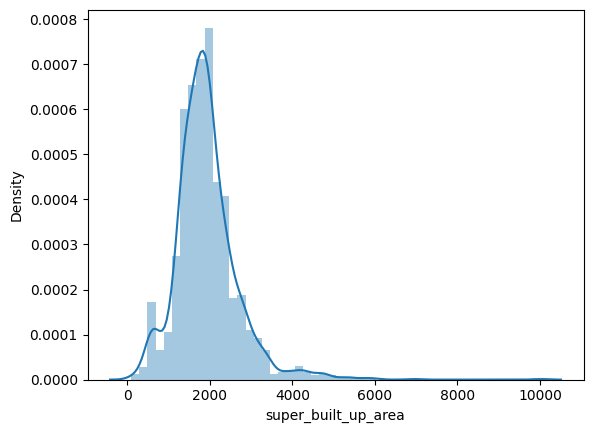

In [57]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

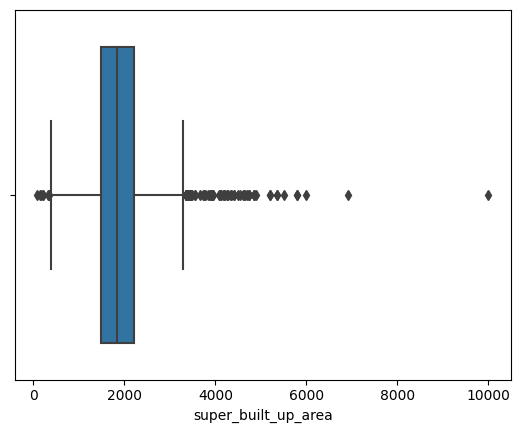

In [58]:
sns.boxplot(x=df['super_built_up_area'])

In [59]:
df['super_built_up_area'].describe()

count     1872.000000
mean      1923.366747
std        763.461282
min         89.000000
25%       1478.750000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [60]:
df[df['super_built_up_area'] < 500]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,pred,luxury_score
583,flat,pivotal devaan,sector 84,0.27,7964.0,339.0,Super Built up area 439(40.78 sq.m.)Carpet are...,1.0,1.0,1,13.0,North-East,Relatively New,439.0,NaN,339.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,49.0
594,flat,avl 36 gurgaon,sector 36a,0.36,8990.0,400.0,Super Built up area 406(37.72 sq.m.)Carpet are...,1.0,1.0,1,7.0,West,Relatively New,406.0,NaN,402.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,74.0
607,flat,sushant lok 1 builder floors,sector 43,2.50,12920.0,1935.0,Super Built up area 215(179.77 sq.m.),3.0,3.0,2,2.0,NaN,New Property,215.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0
904,flat,breez global heights,sohna road,0.25,7002.0,357.0,Super Built up area 414(38.46 sq.m.)Carpet are...,1.0,1.0,1,1.0,NaN,Relatively New,414.0,NaN,357.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0
1238,flat,rof ananda,sector 95,0.25,6578.0,380.0,Super Built up area 380(35.3 sq.m.),1.0,1.0,1,4.0,NaN,New Property,380.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
1308,flat,avl 36 gurgaon,sector 36a,0.37,10539.0,351.0,Super Built up area 352(32.7 sq.m.),1.0,1.0,1,3.0,North,Relatively New,352.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2.0,0.0,49.0
1717,flat,ramsons kshitij,sector 95,0.22,6470.0,340.0,Super Built up area 340(31.59 sq.m.),1.0,1.0,1,2.0,NaN,New Property,340.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
1993,flat,unitech greenwood city,sector 45,2.40,12346.0,1944.0,Super Built up area 216(180.6 sq.m.),3.0,3.0,2,1.0,North-West,New Property,216.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,2.0,0.0,153.0
2436,flat,palam vihar society,sector 2,0.40,8602.0,465.0,Super Built up area 465(43.2 sq.m.)Built Up ar...,1.0,1.0,1,5.0,North,Moderately Old,465.0,450.0,425.00,0.0,0.0,0.0,0.0,0.0,2.0,0.0,42.0
2665,flat,signature global synera,sector 81,0.31,7434.0,417.0,Super Built up area 417(38.74 sq.m.)Carpet are...,1.0,1.0,1,13.0,North,Relatively New,417.0,NaN,320.00,0.0,0.0,0.0,0.0,0.0,1.0,1.0,88.0


In [61]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,pred,luxury_score
996,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5.0,6.0,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0.0,1.0,0.0,1.0,1.0,0.0,0.0,113.0
2225,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4.0,4.0,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,2.0,1.0,167.0


### built up area

<ipython-input-62-7e13bd12b627>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

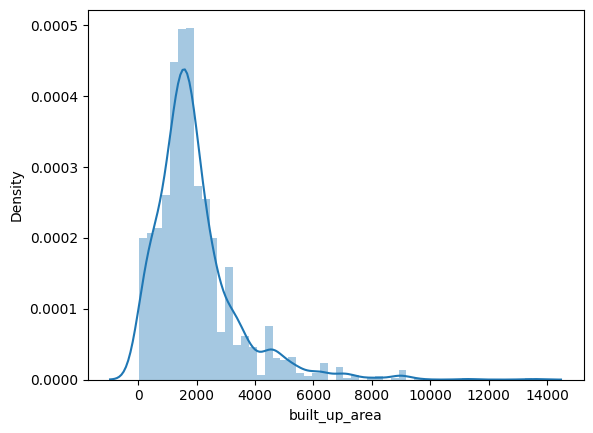

In [62]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

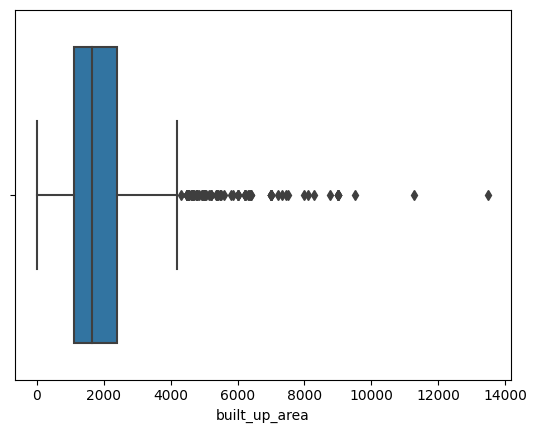

In [63]:
sns.boxplot(x=df['built_up_area'])

In [64]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,pred,luxury_score
487,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,0.0,49.0
2666,house,independent,sector 4,0.85,630.0,5800.0,Plot area 1500(1254.19 sq.m.),3.0,3.0,1,1.0,North,Relatively New,NaN,13500.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,35.0


### carpet area

<ipython-input-65-becec57fa840>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

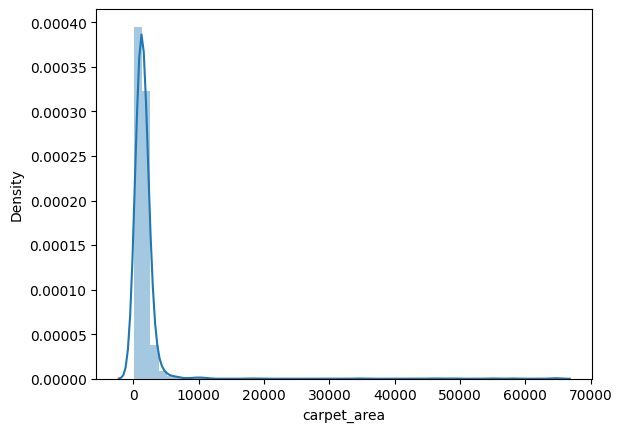

In [65]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

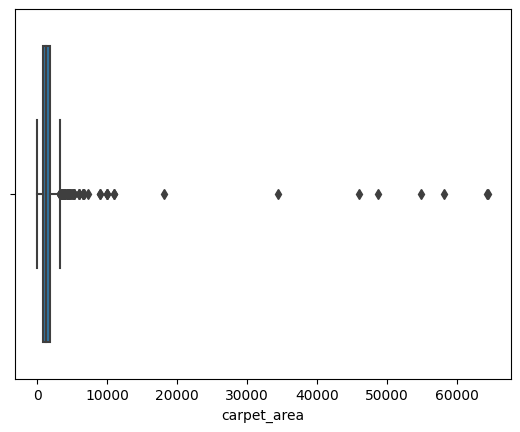

In [66]:
sns.boxplot(x=df['carpet_area'])

In [67]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,pred,luxury_score
961,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Undefined,NaN,NaN,18122.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,100.0
1439,flat,rof ananda,sector 95,0.21,61.0,34426.0,Carpet area: 34401 (3195.96 sq.m.),1.0,1.0,1,13.0,North,Relatively New,NaN,NaN,34401.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135.0
1698,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,68.0
1718,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
1812,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,24.0
2317,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,98.0
2848,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3044,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
3051,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3105,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0


In [68]:
df.loc[2131,'carpet_area'] = 1812

In [69]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,pred,luxury_score
961,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Undefined,NaN,NaN,18122.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,100.0
1439,flat,rof ananda,sector 95,0.21,61.0,34426.0,Carpet area: 34401 (3195.96 sq.m.),1.0,1.0,1,13.0,North,Relatively New,NaN,NaN,34401.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135.0
1698,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,68.0
1718,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
1812,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,24.0
2317,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,98.0
2848,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3044,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
3051,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3105,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0


In [70]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,pred,luxury_score
0,flat,godrej,sector 79,1.30,8269.0,1572.0,Super Built up area 1572(146.04 sq.m.),2.0,2.0,3,3.0,North-East,New Property,1572.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
1,flat,trisara our homes 3,sohna road,0.21,4339.0,484.0,Built Up area: 484 (44.97 sq.m.),1.0,1.0,0,2.0,NaN,Undefined,NaN,484.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,flat,experion the heartsong,sector 108,0.90,7014.0,1283.0,Super Built up area 1283(119.19 sq.m.),2.0,3.0,3,7.0,East,Relatively New,1283.0,NaN,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,72.0
4,house,house number b-34,sector 5,0.80,8888.0,900.0,Plot area 900(83.61 sq.m.)Built Up area: 900 s...,2.0,2.0,1,1.0,NaN,Old Property,NaN,900.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,flat,smart world gems,sector 89,1.13,8500.0,1329.0,Carpet area: 1326 (123.19 sq.m.),3.0,3.0,2,4.0,NaN,Undefined,NaN,NaN,1326.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,115.0


<ipython-input-71-bd70b6910aad>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

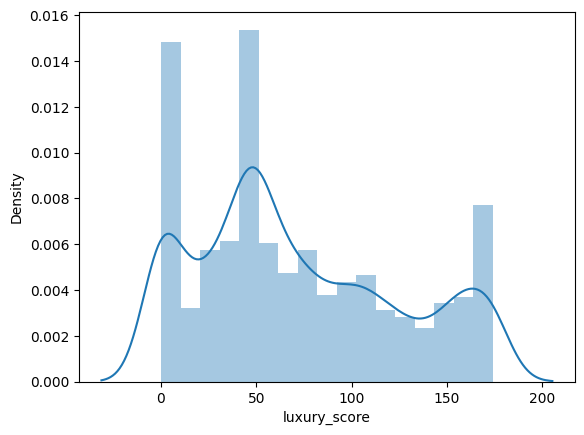

In [71]:
sns.distplot(df['luxury_score'])

<Axes: >

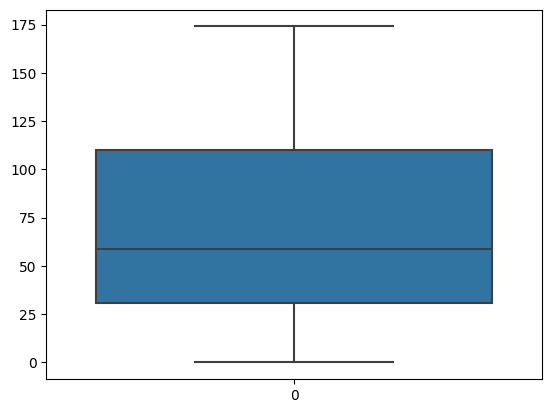

In [72]:
sns.boxplot(df['luxury_score'])

In [73]:
df.shape

(3591, 24)

In [74]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [75]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,pred,luxury_score
0,flat,godrej,sector 79,1.30,8270.0,1572.0,Super Built up area 1572(146.04 sq.m.),2.0,2.0,3,3.0,North-East,New Property,1572.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
1,flat,trisara our homes 3,sohna road,0.21,4339.0,484.0,Built Up area: 484 (44.97 sq.m.),1.0,1.0,0,2.0,NaN,Undefined,NaN,484.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,flat,experion the heartsong,sector 108,0.90,7015.0,1283.0,Super Built up area 1283(119.19 sq.m.),2.0,3.0,3,7.0,East,Relatively New,1283.0,NaN,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,72.0
4,house,house number b-34,sector 5,0.80,8889.0,900.0,Plot area 900(83.61 sq.m.)Built Up area: 900 s...,2.0,2.0,1,1.0,NaN,Old Property,NaN,900.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,flat,smart world gems,sector 89,1.13,8503.0,1329.0,Carpet area: 1326 (123.19 sq.m.),3.0,3.0,2,4.0,NaN,Undefined,NaN,NaN,1326.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,115.0


<ipython-input-76-03a688873ccd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

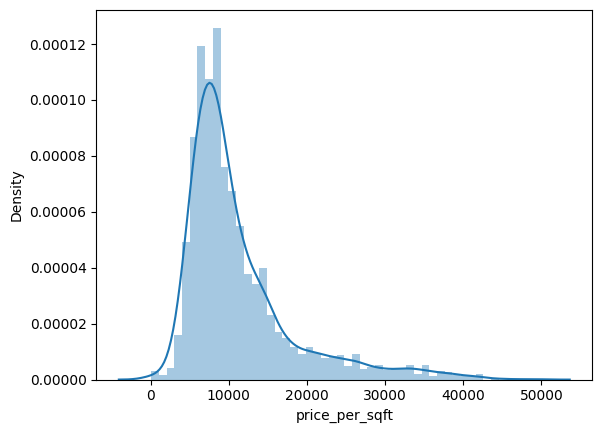

In [76]:
sns.distplot(df['price_per_sqft'])

<Axes: >

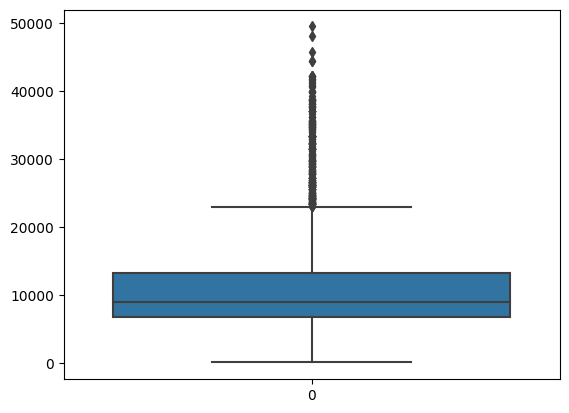

In [77]:
sns.boxplot(df['price_per_sqft'])

In [78]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,pred,luxury_score
456,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3.0,3.0,3+,4.0,North,New Property,NaN,2700.0,NaN,0.0,0.0,0.0,1.0,0.0,2.0,0.0,73.0
1120,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6.0,8.0,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,1.0,20.0
1399,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6.0,8.0,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,0.0,49.0
1700,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5.0,5.0,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
2189,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2.0,2.0,2,3.0,North,Undefined,NaN,2000.0,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2193,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6.0,6.0,3,2.0,East,Relatively New,NaN,4518.0,NaN,1.0,1.0,0.0,0.0,0.0,2.0,1.0,64.0
2522,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0
2640,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9.0,9.0,3+,5.0,East,New Property,NaN,115.0,100.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,49.0
2785,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4.0,5.0,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0.0,1.0,1.0,1.0,0.0,2.0,0.0,111.0


In [79]:
# Area per bedroom to justify the number of bedrooms in the data (Area to room ratio)
x = df[df['price_per_sqft'] <= 20000]
y=(x['area']/x['bedRoom']).quantile(0.05)
y

254.86666666666673

In [80]:
df['Area_to_room_ratio']=df['area']/df['bedRoom']

In [81]:
df.to_csv('Area_BedRoom_Ratio_Outliers.csv',index=False)

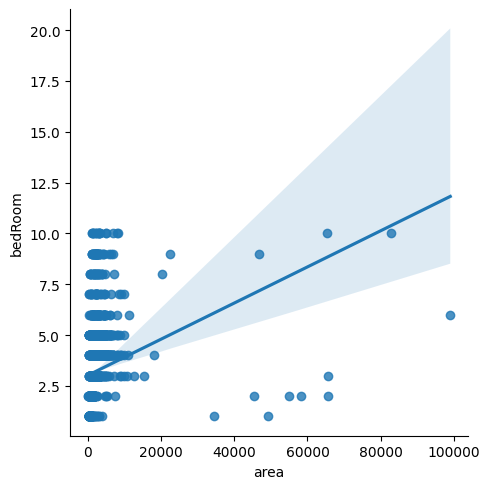

In [82]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [83]:
# Removing values with 'Area_to_Bedrooms_Ratio' below 100
df=df[df['Area_to_room_ratio'] > 100]

In [84]:
# area to bedroom ratio less than 250 and bedrooms greater than 3 we called them as outliers
outliers_df=df[((df['Area_to_room_ratio']) < y) & (df['bedRoom']>3)]

In [85]:
# most probably these properties are land on sale under house name,
# considering that floor numbers could be potential floor that could be build on the plot
# and bedrooms kindda align well with floor numbers
# So we derive new bedroom from floor number by dividing the bedroom by floor.
outliers_df['bedRoom']=round(outliers_df['bedRoom']/outliers_df['floorNum'])

<ipython-input-85-4fbbd4f7af30>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom']=round(outliers_df['bedRoom']/outliers_df['floorNum'])


In [86]:
outliers_df['bedRoom']=round(outliers_df['bedRoom']/outliers_df['floorNum'])

<ipython-input-86-0770af6b66c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom']=round(outliers_df['bedRoom']/outliers_df['floorNum'])


In [87]:
outliers_df.sample(10)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,pred,luxury_score,Area_to_room_ratio
3597,house,independent,sector 4,0.92,15257.0,603.0,Plot area 67(56.02 sq.m.),0.0,4.0,3,4.0,East,Moderately Old,NaN,603.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,150.750000
3537,house,sector 38 rwa,sector 38,4.30,28782.0,1494.0,Plot area 166(138.8 sq.m.)Built Up area: 165 s...,1.0,9.0,3+,3.0,East,Relatively New,NaN,165.0,164.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,88.0,166.000000
2622,house,independent,sector 4,0.65,11111.0,585.0,Plot area 65(54.35 sq.m.),NaN,2.0,2,NaN,NaN,Moderately Old,NaN,585.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,146.250000
1388,house,huda housing board colony,sector 31,4.60,31507.0,1460.0,Plot area 1460(135.64 sq.m.),1.0,4.0,3+,3.0,East,Old Property,NaN,1460.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,150.0,243.333333
1651,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6.0,2.0,3,1.0,NaN,Undefined,NaN,NaN,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142.0,166.666667
1182,house,independent,sector 8,0.82,9111.0,900.0,Plot area 100(83.61 sq.m.),1.0,3.0,3,2.0,North,Moderately Old,NaN,900.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174.0,225.000000
3479,house,iffco nagar and 17b rwa,sector 17,3.50,24306.0,1440.0,Plot area 1440(133.78 sq.m.),1.0,5.0,3,3.0,East,Old Property,NaN,1440.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,240.000000
3147,house,sai kripa floors 5,sector 11,0.90,11250.0,800.0,Plot area 800(74.32 sq.m.),1.0,5.0,3,3.0,NaN,Relatively New,NaN,800.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.000000
3267,house,independent,sector 6,1.25,11574.0,1080.0,Plot area 120(100.34 sq.m.)Built Up area: 120 ...,1.0,5.0,1,2.0,South,New Property,NaN,120.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,127.0,216.000000
3081,house,independent,sector 46,4.35,23693.0,1836.0,Plot area 204(170.57 sq.m.),1.0,8.0,2,3.0,North-East,Relatively New,NaN,1836.0,NaN,1.0,0.0,0.0,1.0,0.0,2.0,0.0,68.0,229.500000


In [88]:
df.update(outliers_df)

In [89]:
df['Area_to_room_ratio']=df['area']/df['bedRoom']

In [90]:
df[(df['Area_to_room_ratio'] <y) & (df['bedRoom']>4)].shape

(13, 25)

In [91]:
# Remove this properties as well
condition = ~((df['Area_to_room_ratio'] < y) & (df['bedRoom'] > 4))
df = df.loc[condition]

In [92]:
df.shape

(3558, 25)

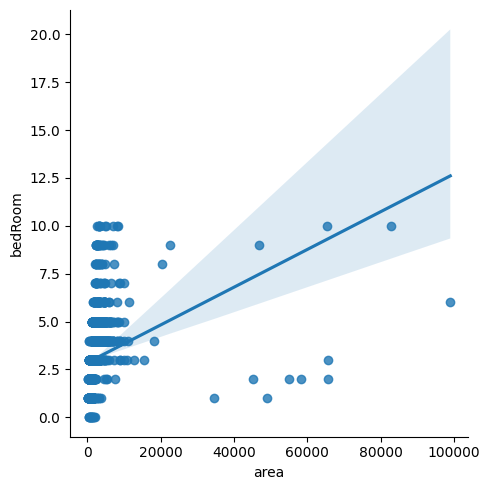

In [93]:
sns.lmplot(data=df,x='area',y='bedRoom')
# Removal of the points with high bedrooms and low area

In [94]:
df.to_csv('gurgaon_properties_outlier_treated.csv',index=False)

#Missing Value Imputation

In [95]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1013
agePossession             0
super_built_up_area    1686
built_up_area          1972
carpet_area            1714
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
pred                      0
luxury_score            113
Area_to_room_ratio        0
dtype: int64

### Built up area

In [96]:
# Fill built area with the help of super built_up area or built up area
# Established the relationship between built_up area and super_built_up area as well as built_up area and carpet_area
# then fill built up area via those relations

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

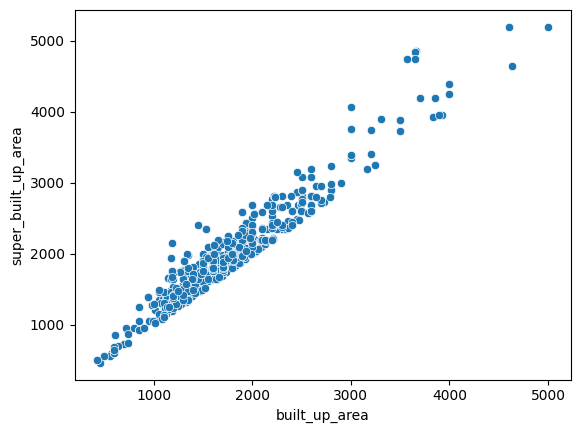

In [97]:
sns.scatterplot(data=df,x=df['built_up_area'],y=df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

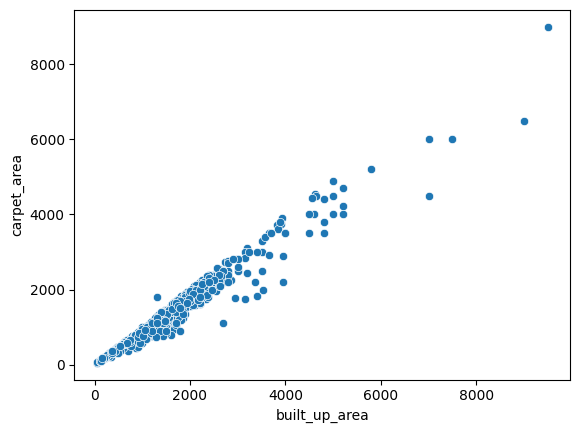

In [98]:
sns.scatterplot(data=df,x=df['built_up_area'],y=df['carpet_area'])

In [99]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())).sum()

0

In [100]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [101]:
all_present_df.shape

(529, 25)

In [102]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [103]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [104]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.1051948051948053 0.900280112044818


In [105]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [106]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,pred,luxury_score,Area_to_room_ratio
9,flat,ss the leaf,sector 85,1.20,10453.0,1148.0,Super Built up area 1640(152.36 sq.m.)Carpet a...,2.0,2.0,3+,2.0,West,Relatively New,1640.0,NaN,1148.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,156.0,574.000000
12,flat,shree vardhman flora,sector 90,1.27,4951.0,2565.0,Super Built up area 2575(239.23 sq.m.)Carpet a...,4.0,5.0,2,9.0,North-East,New Property,2575.0,NaN,1950.00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,83.0,641.250000
18,flat,dlf the ultima,sector 81,2.30,14603.0,1575.0,Super Built up area 2100(195.1 sq.m.)Carpet ar...,3.0,4.0,3+,27.0,East,Relatively New,2100.0,NaN,1575.00,0.0,1.0,0.0,0.0,0.0,2.0,1.0,119.0,525.000000
35,flat,emaar palm gardens,sector 83,1.75,9211.0,1900.0,Super Built up area 1900(176.52 sq.m.)Carpet a...,3.0,3.0,3+,11.0,East,Relatively New,1900.0,NaN,1240.04,0.0,1.0,0.0,0.0,0.0,0.0,1.0,120.0,633.333333
46,flat,dlf the primus,sector 82a,2.60,11439.0,2273.0,Super Built up area 2273(211.17 sq.m.)Carpet a...,4.0,4.0,3+,2.0,East,Relatively New,2273.0,NaN,1340.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,38.0,568.250000


In [107]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

<ipython-input-107-a2fefc960aa3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)


In [108]:
df.update(sbc_df)

In [109]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1013
agePossession             0
super_built_up_area    1686
built_up_area          1551
carpet_area            1714
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
pred                      0
luxury_score            113
Area_to_room_ratio        0
dtype: int64

In [110]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [111]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,pred,luxury_score,Area_to_room_ratio
0,flat,godrej,sector 79,1.30,8270.0,1572.0,Super Built up area 1572(146.04 sq.m.),2.0,2.0,3,3.0,North-East,New Property,1572.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,786.000000
3,flat,experion the heartsong,sector 108,0.90,7015.0,1283.0,Super Built up area 1283(119.19 sq.m.),2.0,3.0,3,7.0,East,Relatively New,1283.0,NaN,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,72.0,641.500000
6,flat,antriksh heights,sector 84,0.88,4822.0,1825.0,Super Built up area 1825(169.55 sq.m.),3.0,3.0,3,16.0,NaN,Relatively New,1825.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,67.0,608.333333
8,flat,pioneer park,sector 61,3.60,12627.0,2851.0,Super Built up area 2851(264.87 sq.m.),4.0,4.0,3,3.0,North,Moderately Old,2851.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,2.0,1.0,121.0,712.750000
10,flat,puri diplomatic greens,sector 111,2.25,13235.0,1700.0,Super Built up area 1700(157.94 sq.m.),3.0,3.0,2,12.0,North-East,Relatively New,1700.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,101.0,566.666667


In [112]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

<ipython-input-112-554030e2e595>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)


In [113]:
df.update(sb_df)

In [114]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1013
agePossession             0
super_built_up_area    1686
built_up_area           677
carpet_area            1714
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
pred                      0
luxury_score            113
Area_to_room_ratio        0
dtype: int64

In [115]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [116]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,pred,luxury_score,Area_to_room_ratio
5,flat,smart world gems,sector 89,1.13,8503.0,1329.0,Carpet area: 1326 (123.19 sq.m.),3.0,3.0,2,4.0,NaN,Undefined,NaN,NaN,1326.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,115.0,443.0
29,flat,signature global park,sohna road,0.54,7248.0,745.0,Carpet area: 745 (69.21 sq.m.),2.0,1.0,3,1.0,NaN,New Property,NaN,NaN,745.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,372.5
39,flat,the lions cghs,sector 56,2.05,8542.0,2400.0,Carpet area: 2400 (222.97 sq.m.),4.0,4.0,3+,8.0,West,Moderately Old,NaN,NaN,2400.00,0.0,0.0,0.0,0.0,0.0,2.0,0.0,49.0,600.0
47,flat,godrej summit,sector 104,0.82,9856.0,832.0,Carpet area: 77.31,2.0,2.0,3,12.0,NaN,Relatively New,NaN,NaN,77.31,1.0,0.0,0.0,0.0,0.0,0.0,1.0,120.0,416.0
49,flat,smart world gems,sector 89,0.88,7964.0,1105.0,Carpet area: 1105 (102.66 sq.m.),2.0,2.0,3,2.0,NaN,New Property,NaN,NaN,1105.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,552.5


In [117]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

<ipython-input-117-747bc7ee3c0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [118]:
df.update(c_df)

In [119]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1013
agePossession             0
super_built_up_area    1686
built_up_area             0
carpet_area            1714
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
pred                      0
luxury_score            113
Area_to_room_ratio        0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

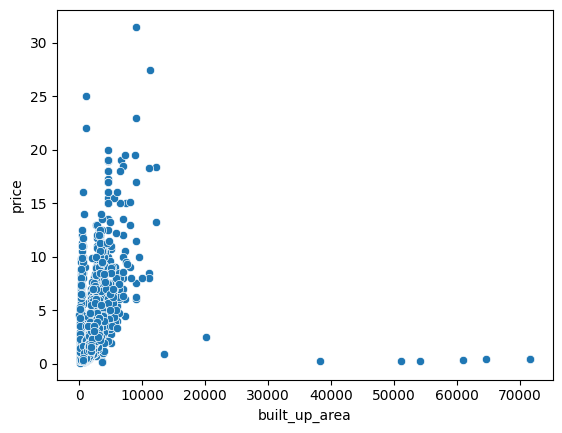

In [120]:
sns.scatterplot(data=df,x='built_up_area',y='price')
# Few anomoly points with high price and low built up area are noticed where built up area is replaced by area values

In [121]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [122]:
anamoly_df.sample(5)

,price,area,built_up_area
1889,2.51,2093.0,1894.0
176,3.15,2153.0,222.0
3180,4.50,3240.0,360.0
1066,3.50,1975.0,1787.0
2067,3.00,1667.0,1654.0


In [123]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [124]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

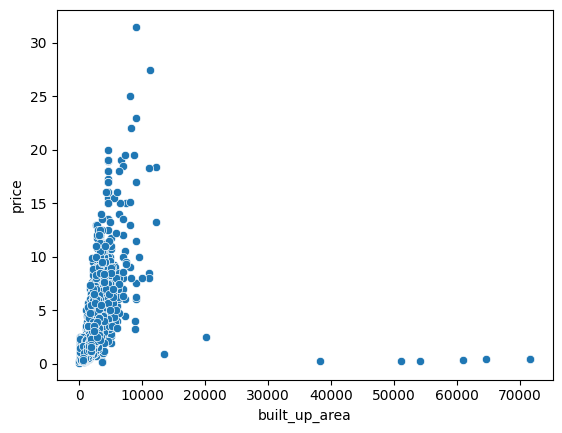

In [125]:
sns.scatterplot(data=df,x='built_up_area',y='price')
# No more anomoly points

In [126]:
# Only keeping built up area column and removing rest all area columns
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','Area_to_room_ratio'],inplace=True)

In [127]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,pred,luxury_score
0,flat,godrej,sector 79,1.30,8270.0,2.0,2.0,3,3.0,North-East,New Property,1423.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
1,flat,trisara our homes 3,sohna road,0.21,4339.0,1.0,1.0,0,2.0,NaN,Undefined,484.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,flat,experion the heartsong,sector 108,0.90,7015.0,2.0,3.0,3,7.0,East,Relatively New,1161.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,72.0
4,house,house number b-34,sector 5,0.80,8889.0,2.0,2.0,1,1.0,NaN,Old Property,900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,flat,smart world gems,sector 89,1.13,8503.0,3.0,3.0,2,4.0,NaN,Undefined,1473.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,115.0


In [128]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1013
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
pred                  0
luxury_score        113
dtype: int64

### floorNum

In [129]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,pred,luxury_score
212,flat,NaN,sector 78,0.60,3692.0,2.0,2.0,0,NaN,NaN,Under Construction,1625.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
936,house,independent,sector 26,4.60,12198.0,4.0,4.0,3+,NaN,NaN,Old Property,3771.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0
1207,house,independent,sector 24,1.45,2984.0,3.0,3.0,1,NaN,NaN,Old Property,540.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0
1399,house,independent,sector 25,13.00,45710.0,6.0,8.0,3+,NaN,NaN,Relatively New,2844.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,49.0
1438,house,independent,sector 2,5.60,17284.0,8.0,6.0,3+,NaN,South-West,Moderately Old,3240.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,24.0
1467,house,jacob pura,sector 12,0.35,9722.0,2.0,1.0,0,NaN,NaN,Old Property,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132.0
1580,house,independent,sector 7,6.50,15046.0,3.0,2.0,3+,NaN,NaN,Old Property,4320.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.0
1800,house,ansal sushant lok plots,sector 43,3.30,26570.0,1.0,1.0,0,NaN,NaN,Under Construction,1242.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,157.0
1829,flat,experion heartsong,dwarka expressway,1.08,6150.0,3.0,3.0,0,NaN,NaN,Under Construction,1758.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1838,house,emaar mgf marbella,sector 66,9.00,21251.0,4.0,4.0,3+,NaN,South-West,Relatively New,5200.0,0.0,1.0,1.0,1.0,0.0,2.0,1.0,0.0


In [130]:
# Filling the values with median as almost all ara houses

In [131]:
df[df['property_type']=='house']['floorNum'].median()

2.0

In [132]:
df['floorNum'].fillna(2.0,inplace=True)

In [133]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1013
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
pred                  0
luxury_score        113
dtype: int64

In [134]:
1011/df.shape[0]

0.28414839797639124

### facing

<Axes: ylabel='facing'>

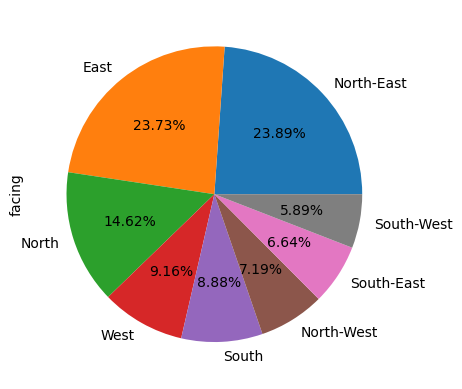

In [135]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [136]:
df.drop(columns=['facing'],inplace=True)

In [137]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,pred,luxury_score
645,flat,maxworth city residences,sector 10a,0.90,7081.0,2.0,2.0,3,9.0,New Property,1086.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
965,flat,mapsko mount ville,sector 79,1.40,9396.0,3.0,3.0,3,2.0,New Property,1656.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,58.0
1206,flat,ats triumph,sector 104,1.75,7642.0,3.0,4.0,3+,11.0,Relatively New,2072.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,149.0
3484,flat,ireo skyon,sector 60,3.05,12788.0,3.0,3.0,3,9.0,Relatively New,2300.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,65.0
3140,flat,godrej air,sector 85,1.30,14541.0,2.0,2.0,3,30.0,Undefined,1130.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,58.0


In [138]:
df.isnull().sum()

property_type        0
society              1
sector               0
price                0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
floorNum             0
agePossession        0
built_up_area        0
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
pred                 0
luxury_score       113
dtype: int64

In [139]:
df.drop(index=[2536],inplace=True)

In [140]:
df.isnull().sum()

property_type        0
society              1
sector               0
price                0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
floorNum             0
agePossession        0
built_up_area        0
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
pred                 0
luxury_score       113
dtype: int64

### agePossession

In [141]:
# Fill most frequent values based for that sector and property_type
# In second imputaion fill base on the sectors alone and in third based on property types alone

In [142]:
df['agePossession'].value_counts()

Relatively New        1606
New Property           558
Moderately Old         542
Undefined              425
Old Property           293
Under Construction     133
Name: agePossession, dtype: int64

In [143]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,pred,luxury_score
1,flat,trisara our homes 3,sohna road,0.21,4339.0,1.0,1.0,0,2.0,Undefined,484.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,flat,smart world gems,sector 89,1.13,8503.0,3.0,3.0,2,4.0,Undefined,1473.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,115.0
23,flat,assotech blith,sector 99,1.90,6702.0,4.0,4.0,3+,2.0,Undefined,2835.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0
45,flat,sare petioles,sector 92,1.30,6373.0,4.0,4.0,0,7.0,Undefined,2040.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,flat,satya the hermitage,sector 103,0.80,5517.0,2.0,2.0,0,10.0,Undefined,1450.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3609,flat,godrej nature plus,sector 33,1.08,13123.0,2.0,2.0,3,8.0,Undefined,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3621,flat,dlf 76,new,4.00,11429.0,4.0,4.0,2,4.0,Undefined,3889.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,NaN
3624,house,independent,sector 92,1.80,7627.0,4.0,5.0,0,13.0,Undefined,2360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3627,flat,chintamani,sector 103,1.57,8509.0,3.0,3.0,3,1.0,Undefined,1845.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [144]:
# Fill most frequent values based for that sector and property_type
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [145]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [146]:
df['agePossession'].value_counts()

Relatively New        1797
New Property           624
Moderately Old         582
Old Property           329
Under Construction     135
Undefined               90
Name: agePossession, dtype: int64

In [147]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [148]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [149]:
df['agePossession'].value_counts()

Relatively New        1810
New Property           649
Moderately Old         589
Old Property           340
Under Construction     135
Undefined               34
Name: agePossession, dtype: int64

In [150]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [151]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [152]:
df['agePossession'].value_counts()

Relatively New        1821
New Property           649
Moderately Old         612
Old Property           340
Under Construction     135
Name: agePossession, dtype: int64

In [153]:
df.isnull().sum()

property_type        0
society              1
sector               0
price                0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
floorNum             0
agePossession        0
built_up_area        0
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
pred                 0
luxury_score       113
dtype: int64

In [156]:
df.to_csv('5_gurgaon_properties_missing_value_imputation.csv',index=False)

In [155]:
df.shape

(3557, 19)